In [39]:
# for cvs file
import pandas as pd,  numpy as np, os
working_directory = os.getcwd()
import pickle
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import matplotlib.pyplot as plt

In [6]:
# read csv data
tmqm_data = pd.read_csv(working_directory+'/tmQM_y.csv', sep=';', header=0)

In [42]:
# Feature Columns
features = ["Electronic_E", "Dispersion_E", "Dipole_M", "Metal_q", "HOMO_Energy", "LUMO_Energy", "Polarizability"]
X = tmqm_data[features] #.values

# Target Column
target = ["HL_Gap"]
y = tmqm_data[target] #.values

# Standardize the features (mean=0, std_dev=1)
scaler = StandardScaler()
X= scaler.fit_transform(X) 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## kNN

In [22]:
max_k = 10

error_rates = list()

for k in range (1, max_k):
    knn = KNeighborsRegressor(n_neighbors= k, weights='distance')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    error_rates.append((k, mse))
error_rates   

[(1, 0.00015575358310736744),
 (2, 0.00011796572937509682),
 (3, 0.00010907627802897596),
 (4, 0.00010726614494322391),
 (5, 0.00010637659256141499),
 (6, 0.0001079893216773697),
 (7, 0.00010988262962799536),
 (8, 0.00011222315739881725),
 (9, 0.00011407364748023225)]

<AxesSubplot:xlabel='k'>

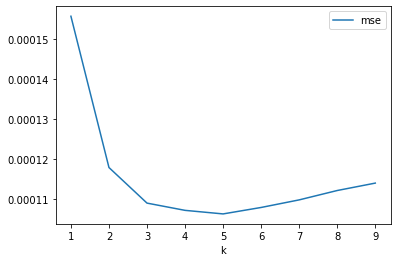

In [26]:
# visualize 
df_error_rates = pd.DataFrame(error_rates, columns=['k', 'mse'])
df_error_rates.plot(x='k', y='mse', kind='line')

In [24]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [25]:
# calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

# calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

# calculate RMSE
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

# Calculate the R2
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

mae: 0.007412727398603819
mse: 0.00011400707886736284
rmse: 0.010677409745222051
R2: 0.8998221613592453


----------------------------------------------------------------------------

## Polynomial Linear Regression

In [30]:
poly= PolynomialFeatures(2)
X_poly= poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= 0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [31]:
# calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

# calculate MSE

mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

# calculate RMSE
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

# Calculate the R2
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

mae: 8.290095169983625e-17
mse: 1.3183598605124264e-32
rmse: 1.148198528353188e-16
R2: 1.0


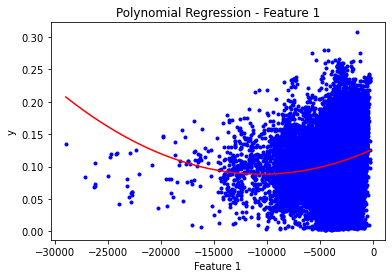

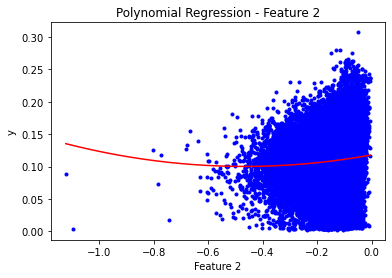

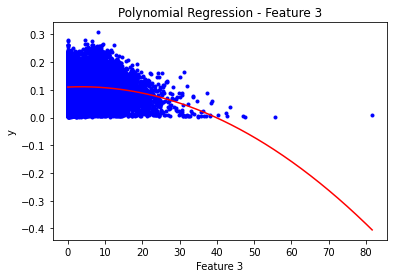

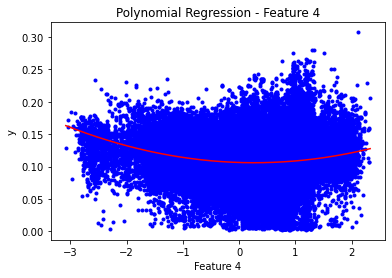

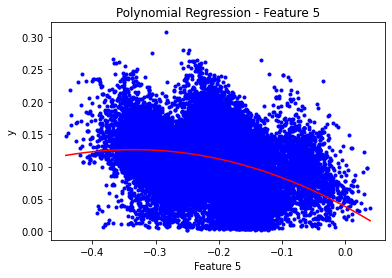

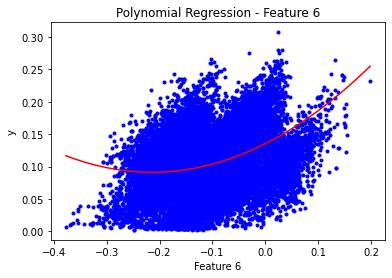

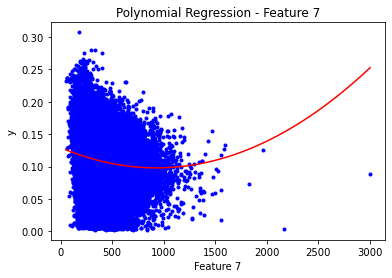

In [44]:
# visualize polynomial regression

# Feature Columns
features = ["Electronic_E", "Dispersion_E", "Dipole_M", "Metal_q", "HOMO_Energy", "LUMO_Energy", "Polarizability"]
X = tmqm_data[features] #.values

# Target Column
target = ["HL_Gap"]
y = tmqm_data[target] #.values

# Note: X should be your feature matrix and y your target variable

for i in range(X.shape[1]):  # Iterate over each feature
    feature = X.iloc[:, i].values.reshape(-1, 1) # Select current feature

    # Fit polynomial regression on the current feature
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    feature_poly = poly_features.fit_transform(feature)
    lin_reg = LinearRegression()
    lin_reg.fit(feature_poly, y)

    # Create a range of values for the current feature for plotting
    x = np.linspace(feature.min(), feature.max(), 500).reshape(-1, 1)

    # Transform these values and predict y
    x_poly = poly_features.transform(x)
    y_pred = lin_reg.predict(x_poly)

    # Plot the actual data in blue
    plt.plot(feature, y, "b.")

    # Plot the predicted data in red
    plt.plot(x, y_pred, "r-")
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression - Feature {i+1}")

    plt.show()
